In [0]:
# based on https://github.com/ageitgey/face_recognition/issues/700


#Install dlib library

!apt update
!apt install -y tree
!apt install -y cmake
!pip install dlib

import dlib
import dlib.cuda as cuda
print("cuda.get_num_devices()->",cuda.get_num_devices())
dlib.DLIB_USE_CUDA=1
dlib.USE_AVX_INSTRUCTIONS=1


Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [31.0 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/r

In [0]:
#Install face_recognition library

!pip install face_recognition
import face_recognition
print('face_recognition.__version__ ->',face_recognition.__version__)

!pip install imutils



    100% |████████████████████████████████| 100.2MB 357kB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
face_recognition.__version__ -> 1.2.3


In [0]:
# dodatkowe potrzebne bibioteki

!pip install wget


  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
# getting home directory
import os
home_directory=os.getcwd()

In [0]:
# installing datasets ... and python scripts

import os  
os.chdir(home_directory)
!ls -la 
if not (os.path.isdir('./PythonForML')):
  !git clone https://github.com/djkormo/PythonForML.git

!git pull

total 16
drwxr-xr-x 1 root root 4096 Mar  8 17:26 .
drwxr-xr-x 1 root root 4096 Mar 27 08:46 ..
drwxr-xr-x 1 root root 4096 Mar  8 17:25 .config
drwxr-xr-x 1 root root 4096 Mar  8 17:26 sample_data
Cloning into 'PythonForML'...
remote: Enumerating objects: 298, done.
remote: Counting objects: 100% (298/298), done.
remote: Compressing objects: 100% (285/285), done.
remote: Total 421 (delta 14), reused 288 (delta 9), pack-reused 123
Receiving objects: 100% (421/421), 122.12 MiB | 28.38 MiB/s, done.
Resolving deltas: 100% (62/62), done.
fatal: not a git repository (or any of the parent directories): .git


In [0]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Mar 27 09:27 .
drwxr-xr-x 1 root root 4096 Mar 27 08:46 ..
drwxr-xr-x 1 root root 4096 Mar  8 17:25 .config
drwxr-xr-x 5 root root 4096 Mar 27 09:27 PythonForML
drwxr-xr-x 1 root root 4096 Mar  8 17:26 sample_data


In [0]:
# Using proper directory 
import os
home_directory=os.getcwd()
images_directory='PythonForML/computervision/facerecognition/'
os.chdir(home_directory)


In [0]:
import os
os.chdir(images_directory)
!ls -la

total 24
drwxr-xr-x  4 root root 4096 Mar 27 09:27 .
drwxr-xr-x  4 root root 4096 Mar 27 09:27 ..
drwxr-xr-x 10 root root 4096 Mar 27 09:27 dataset
-rw-r--r--  1 root root 1999 Mar 27 09:27 encode_faces.py
drwxr-xr-x  2 root root 4096 Mar 27 09:27 examples
-rw-r--r--  1 root root 3042 Mar 27 09:27 recognize_faces_image.py


In [0]:
# what we have inside 
!tree --filelimit 10 --dirsfirst

.
├── dataset
│   ├── alan_grant [22 entries exceeds filelimit, not opening dir]
│   ├── boguslaw_linda
│   │   ├── 000001.png
│   │   ├── 000002.jpg
│   │   ├── 000003.jpg
│   │   ├── 000004.jpg
│   │   ├── 000005.jpg
│   │   └── 000006.jpg
│   ├── cezary_pazura
│   │   ├── 000001.png
│   │   ├── 000002.png
│   │   ├── 000003.png
│   │   ├── 000004.png
│   │   ├── 000005.jpg
│   │   └── 000006.jpg
│   ├── claire_dearing [53 entries exceeds filelimit, not opening dir]
│   ├── ellie_sattler [31 entries exceeds filelimit, not opening dir]
│   ├── ian_malcolm [41 entries exceeds filelimit, not opening dir]
│   ├── john_hammond [36 entries exceeds filelimit, not opening dir]
│   └── owen_grady [35 entries exceeds filelimit, not opening dir]
├── examples
│   ├── example_01.png
│   ├── example_02.png
│   ├── example_03.png
│   ├── example_101.png
│   └── example_102.jpg
├── encode_faces.py
└── recognize_faces_image.py

10 directories, 19 files


https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/

In [0]:
# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [0]:
# After installing all the library & importing dataset, then i run following command
!python encode_faces.py --dataset dataset --encodings encodings.pickle

[INFO] quantifying faces...
[INFO] processing image 1/230
[INFO] processing image 2/230
[INFO] processing image 3/230
[INFO] processing image 4/230
[INFO] processing image 5/230
[INFO] processing image 6/230
[INFO] processing image 7/230
[INFO] processing image 8/230
[INFO] processing image 9/230
[INFO] processing image 10/230
[INFO] processing image 11/230
[INFO] processing image 12/230
[INFO] processing image 13/230
[INFO] processing image 14/230
[INFO] processing image 15/230
[INFO] processing image 16/230
[INFO] processing image 17/230
[INFO] processing image 18/230
[INFO] processing image 19/230
[INFO] processing image 20/230
[INFO] processing image 21/230
[INFO] processing image 22/230
[INFO] processing image 23/230
[INFO] processing image 24/230
[INFO] processing image 25/230
[INFO] processing image 26/230
[INFO] processing image 27/230
[INFO] processing image 28/230
[INFO] processing image 29/230
[INFO] processing image 30/230
[INFO] processing image 31/230
[INFO] processing im

In [0]:
!ls -lh encodings*

-rw-r--r-- 1 root root 249K Mar 27 09:28 encodings.pickle


In [0]:
!cat encode_faces.py

# USAGE
# python encode_faces.py --dataset dataset --encodings encodings.pickle

# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--dataset", required=True,
	help="path to input directory of faces + images")
ap.add_argument("-e", "--encodings", required=True,
	help="path to serialized db of facial encodings")
ap.add_argument("-d", "--detection-method", type=str, default="cnn",
	help="face detection model to use: either `hog` or `cnn`")
args = vars(ap.parse_args())

# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images(args["dataset"]))

# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person na

In [0]:
!ls -la *.py

-rw-r--r-- 1 root root 1999 Mar 27 09:27 encode_faces.py
-rw-r--r-- 1 root root 3042 Mar 27 09:27 recognize_faces_image.py


DisabledFunctionError: 
cv2.imshow is disabled in Colab: 
Running cv2.imshow causes jupyter sessions to crash;
for details see https://github.com/jupyter/notebook/issues/3935.
If you would like to re-enable this function, first run:
  import os
  os.environ["ENABLE_CV2_IMSHOW"] = 'true'

For an alternative, see Colab's code snippets:

In [0]:
import cv2
import numpy as np
import PIL
from IPython.display import display

def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks."""
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [0]:
# sychronising repo content
!git pull

Already up to date.


In [0]:
# recognising faces in one  image 
def recognize_face(data_file,file_name):

  import pickle
  print("[INFO] recognising in file {} ".format(file_name))
  # load the known faces and embeddings
  print("[INFO] loading encodings...begin... ")
  data = pickle.loads(open(data_file, "rb").read())
  print("[INFO] loading encodings...end... ")
  
  # load the input image and convert it from BGR to RGB
  image = cv2.imread(file_name)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # detect the (x, y)-coordinates of the bounding boxes corresponding
  # to each face in the input image, then compute the facial embeddings
  # for each face
  print("[INFO] recognizing faces....begin....")
  boxes = face_recognition.face_locations(rgb,model='cnn')
  encodings = face_recognition.face_encodings(rgb, boxes)

  # initialize the list of names for each face detected
  names = []

  # loop over the facial embeddings
  for encoding in encodings:
	  # attempt to match each face in the input image to our known
	  # encodings
	  matches = face_recognition.compare_faces(data["encodings"],
		  encoding)
	  name = "Unknown"

	  # check to see if we have found a match
	  if True in matches:
		  # find the indexes of all matched faces then initialize a
		  # dictionary to count the total number of times each face
		  # was matched
		  matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		  counts = {}

		  # loop over the matched indexes and maintain a count for
		  # each recognized face face
		  for i in matchedIdxs:
			  name = data["names"][i]
			  counts[name] = counts.get(name, 0) + 1

		  # determine the recognized face with the largest number of
		  # votes (note: in the event of an unlikely tie Python will
		  # select first entry in the dictionary)
		  name = max(counts, key=counts.get)
	
	  # update the list of names
	  names.append(name)

  # loop over the recognized faces
  for ((top, right, bottom, left), name) in zip(boxes, names):
	  # draw the predicted face name on the image
	  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	  y = top - 15 if top - 15 > 15 else top + 15
	  cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		  0.75, (0, 255, 255), 2)

  # show the output image
  cv2_imshow(image)
  cv2.waitKey(0)

  print("[INFO] Detected persons:->",names)
  print("[INFO] recognizing faces....end....")

[INFO] recognising in file examples/example_01.png 
[INFO] loading encodings...begin... 
[INFO] loading encodings...end... 
[INFO] recognizing faces....begin....


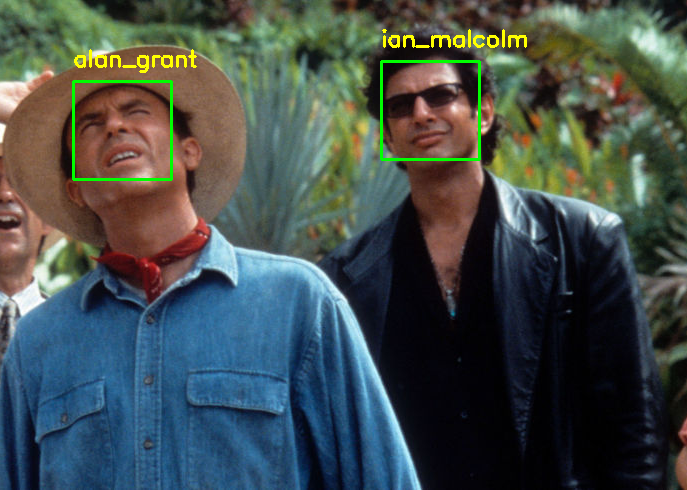

[INFO] Detected persons:-> ['ian_malcolm', 'alan_grant']
[INFO] recognizing faces....end....
[INFO] recognising in file examples/example_02.png 
[INFO] loading encodings...begin... 
[INFO] loading encodings...end... 
[INFO] recognizing faces....begin....


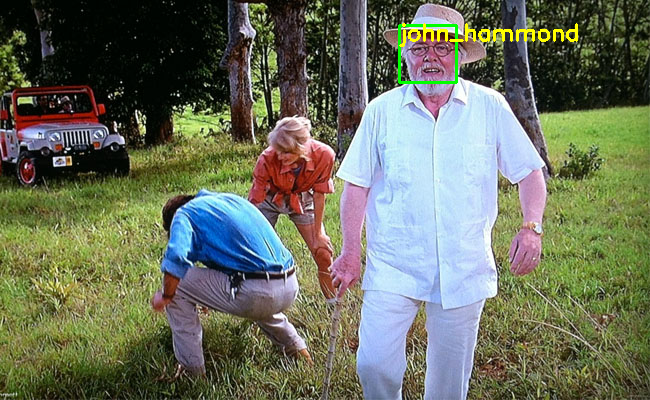

[INFO] Detected persons:-> ['john_hammond']
[INFO] recognizing faces....end....
[INFO] recognising in file examples/example_03.png 
[INFO] loading encodings...begin... 
[INFO] loading encodings...end... 
[INFO] recognizing faces....begin....


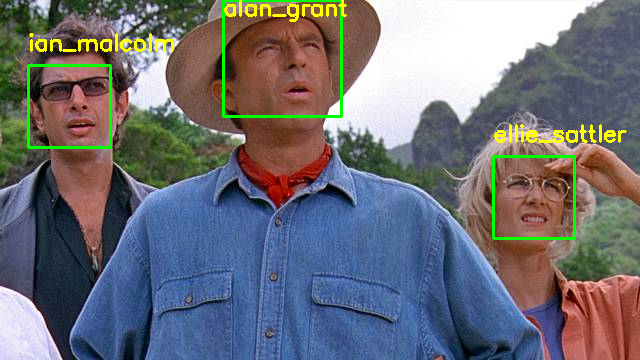

[INFO] Detected persons:-> ['ellie_sattler', 'ian_malcolm', 'alan_grant']
[INFO] recognizing faces....end....
[INFO] recognising in file examples/example_101.png 
[INFO] loading encodings...begin... 
[INFO] loading encodings...end... 
[INFO] recognizing faces....begin....


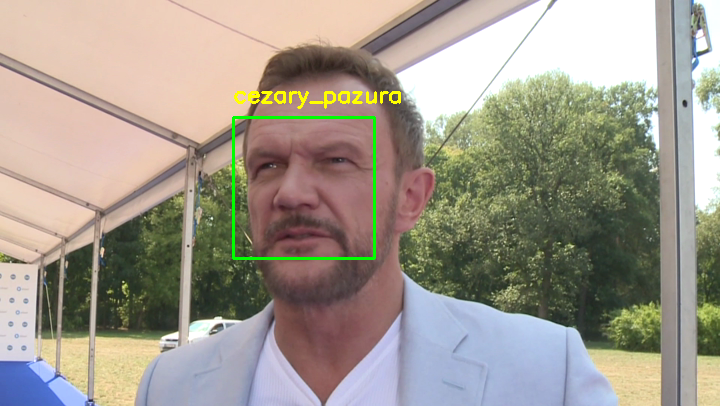

[INFO] Detected persons:-> ['cezary_pazura']
[INFO] recognizing faces....end....
[INFO] recognising in file examples/example_102.jpg 
[INFO] loading encodings...begin... 
[INFO] loading encodings...end... 
[INFO] recognizing faces....begin....


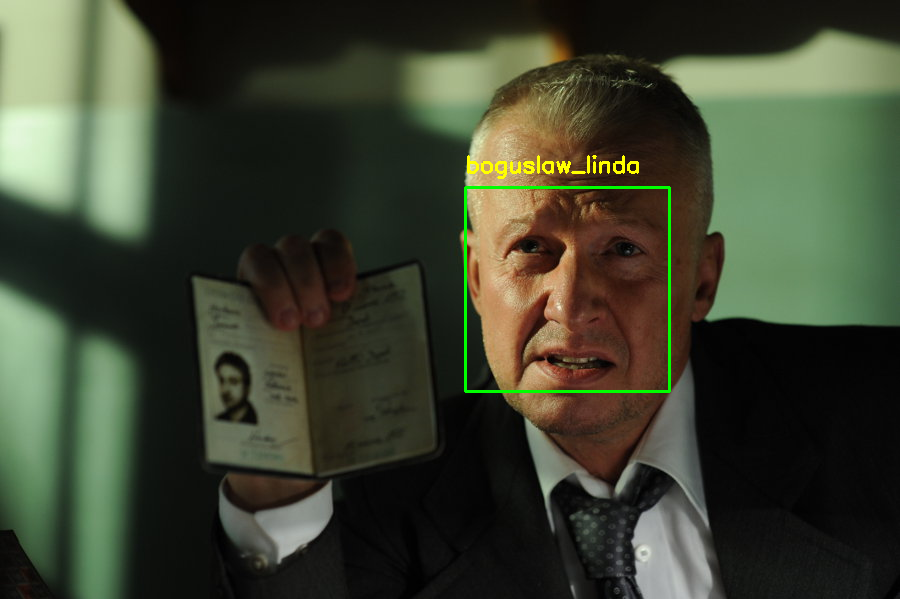

[INFO] Detected persons:-> ['boguslaw_linda']
[INFO] recognizing faces....end....


In [0]:
recognize_face(data_file='encodings.pickle',file_name='examples/example_01.png')
recognize_face(data_file='encodings.pickle',file_name='examples/example_02.png')
recognize_face(data_file='encodings.pickle',file_name='examples/example_03.png')
recognize_face(data_file='encodings.pickle',file_name='examples/example_101.png')
recognize_face(data_file='encodings.pickle',file_name='examples/example_102.jpg')


